In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Import public modules
import copy
import os
import sys
import numpy as np
import matplotlib.pyplot as plt

# Add the parent directory (corresponding to the base project directory) 
# to the path to allow imports from all folders in the project
parent_dir_path = os.path.dirname(os.getcwd())
if parent_dir_path not in sys.path:
    sys.path.append(parent_dir_path)

# Import custom modules
from src import hyperparameter_analysis

Initialization completed, either construct the (raw and combined) DataFrames from the training output files '.construct()' or load them '.load()' (if they have already beend constructed and saved).


Load instance information from the folder saved/hyperparam_analysis_files/hyperparam_scans
Loaded the values of the attribute 'model_name'
Loaded the values of the attribute 'labels'
Loaded the values of the attribute 'date_range'
Loaded the values of the attribute 'hyperparam_names_set'
Loaded the values of the attribute 'problematic_runs'
Loaded the values of the attribute 'missing_args_dict_list'
Loading done


Number of problematic runs: 0
Number of missing runs: 0



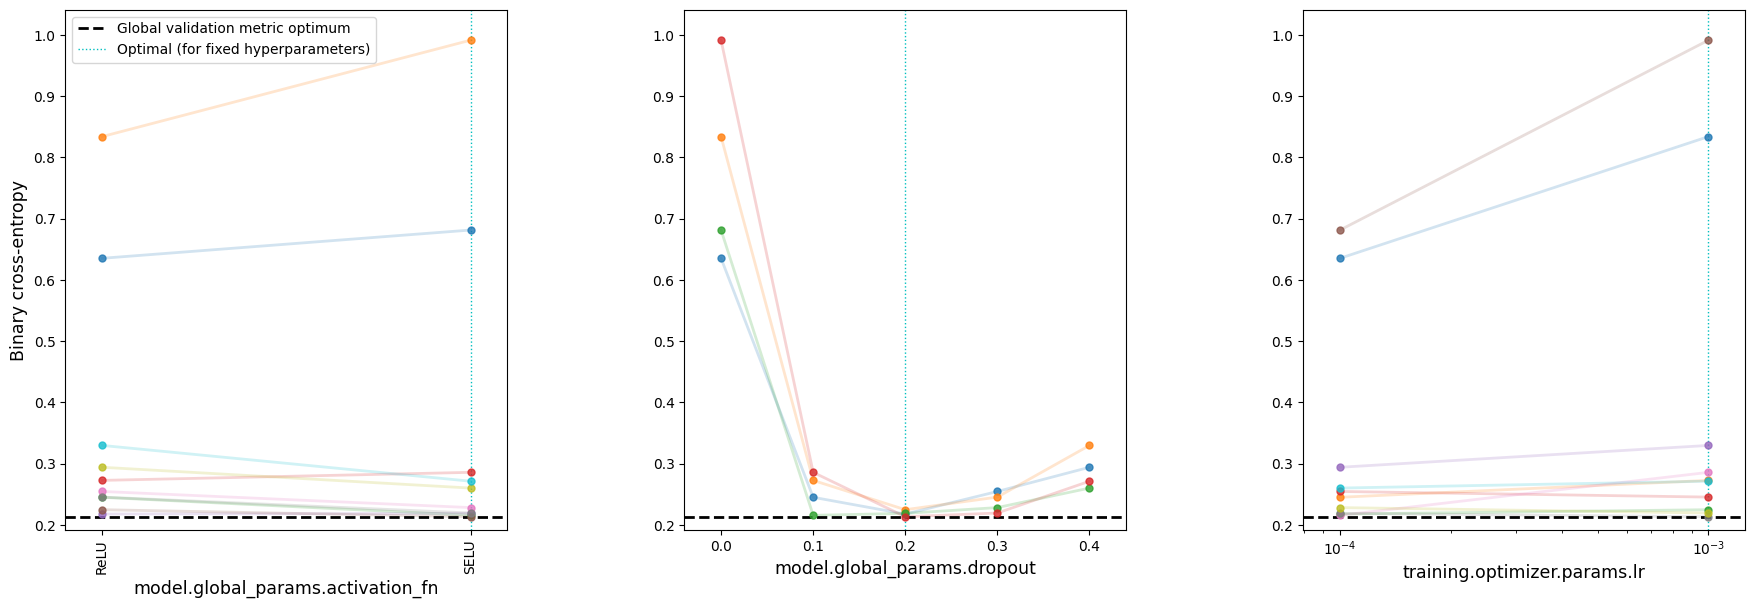

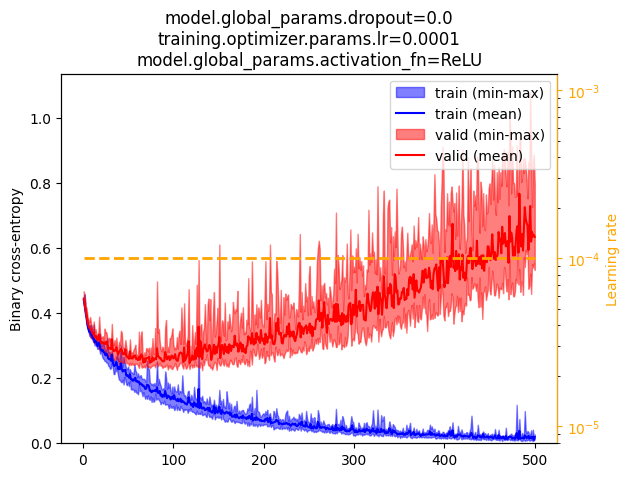

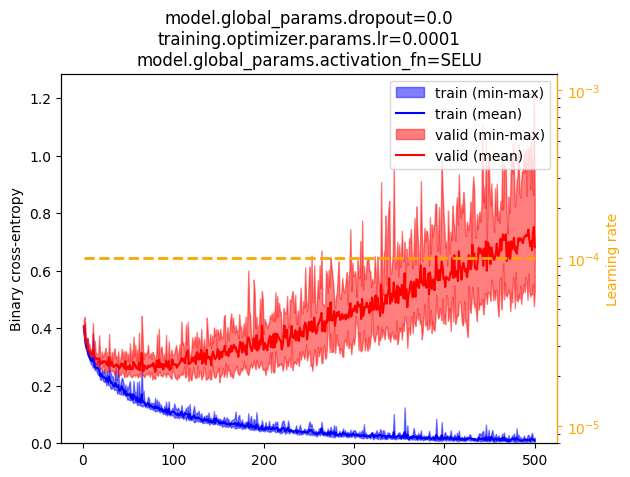

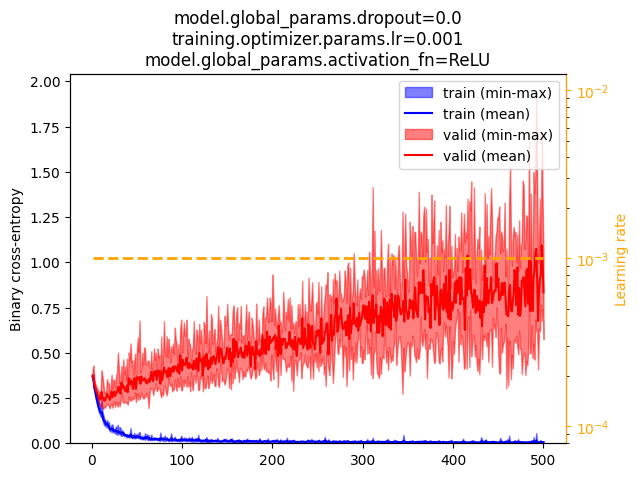

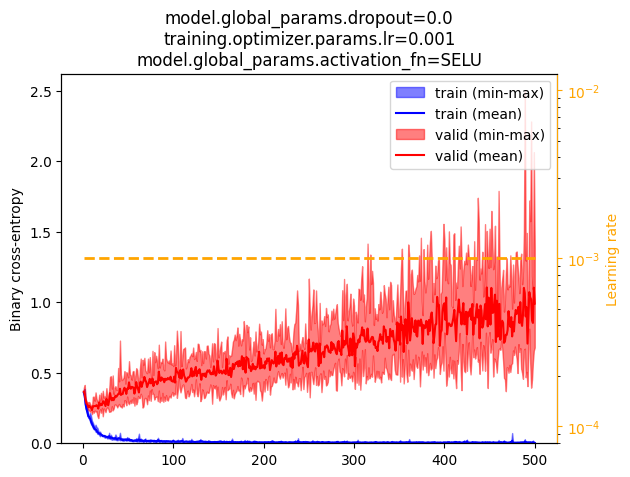

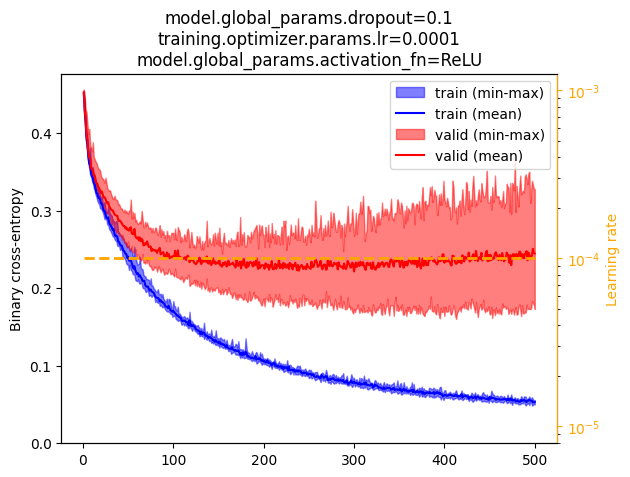

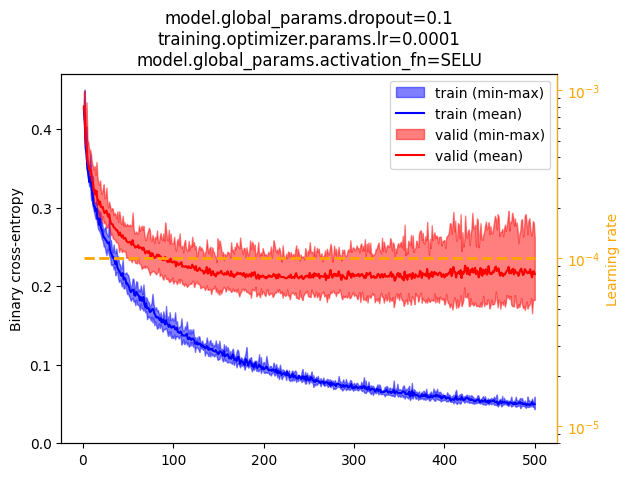

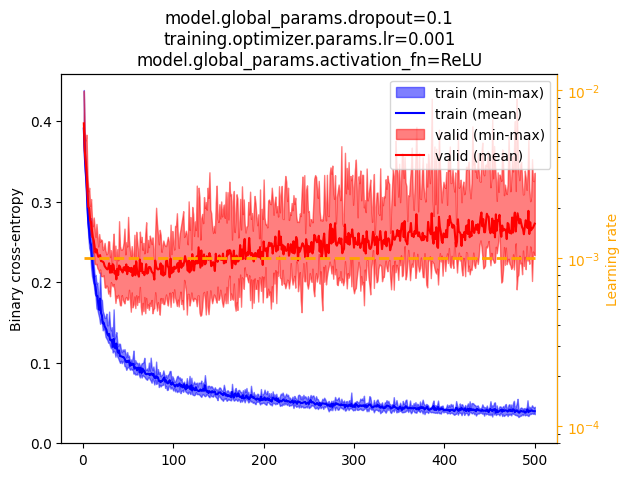

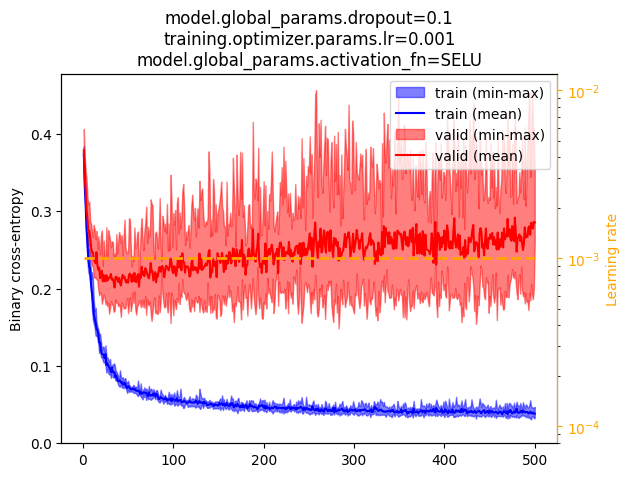

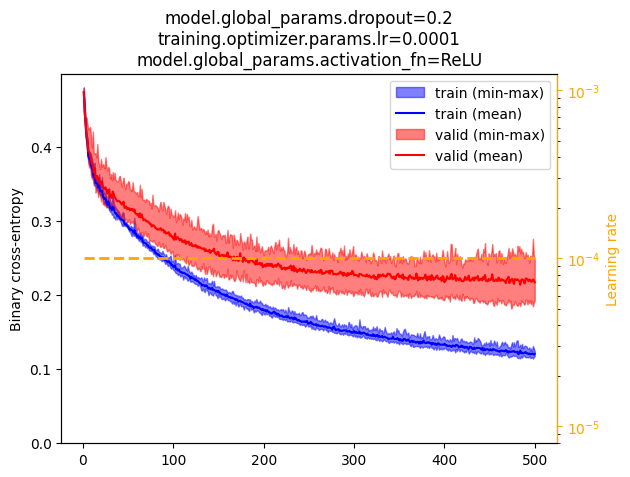

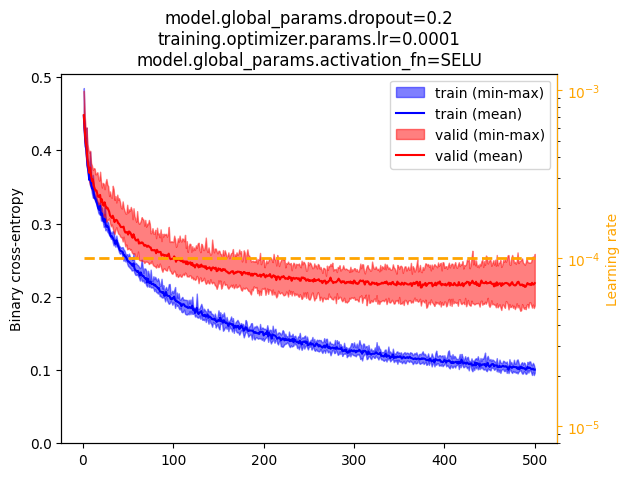

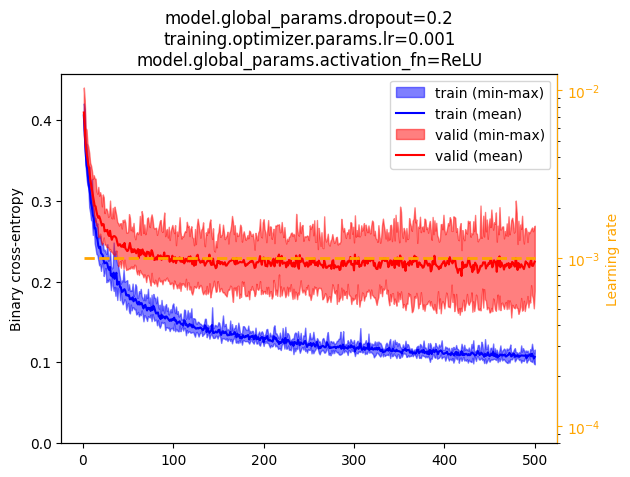

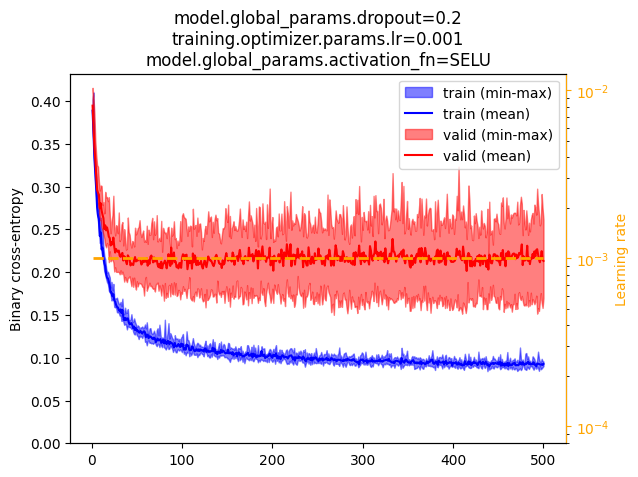

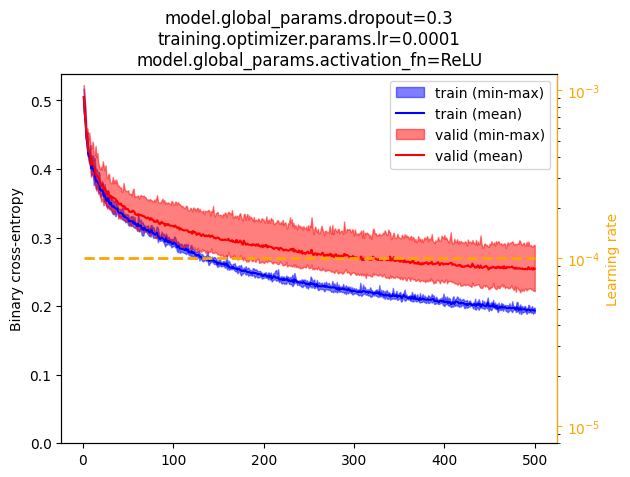

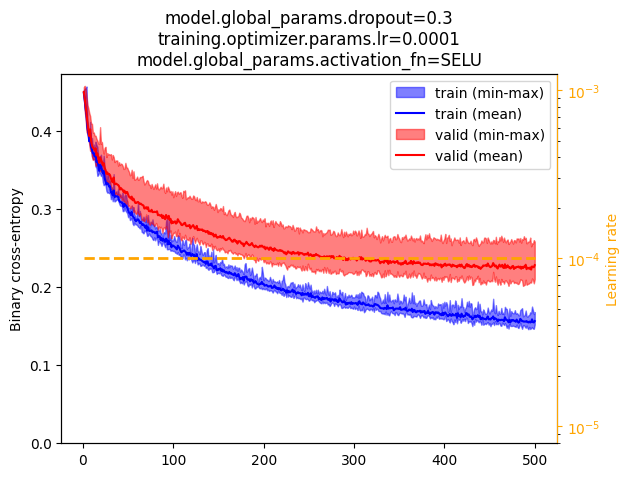

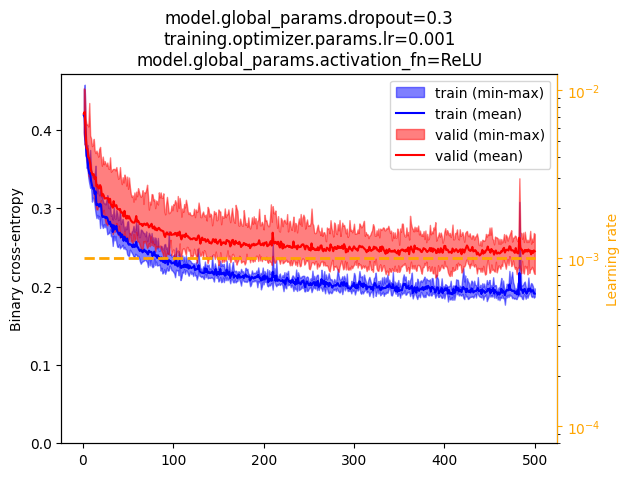

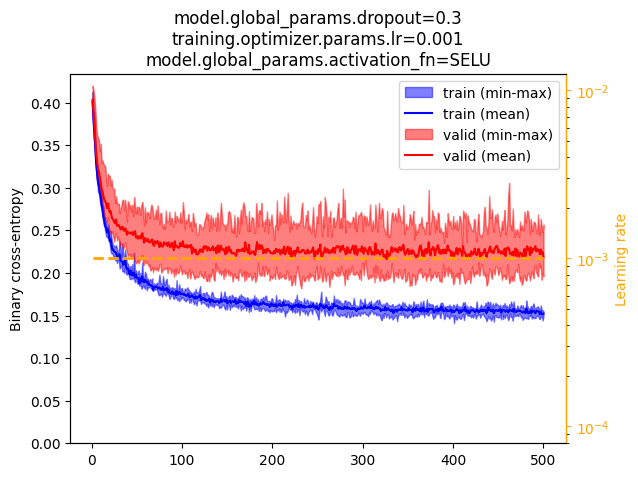

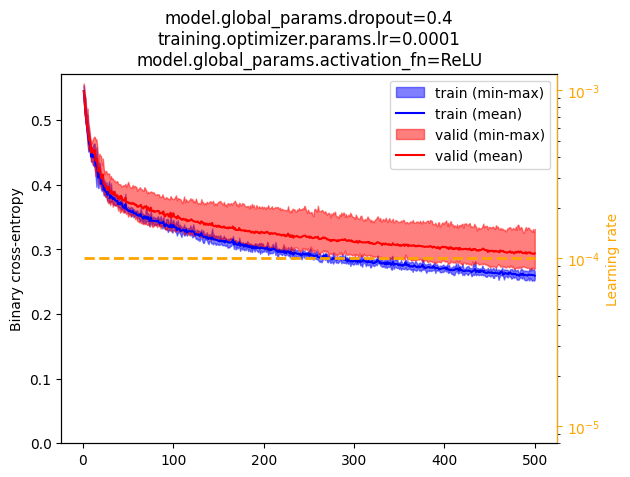

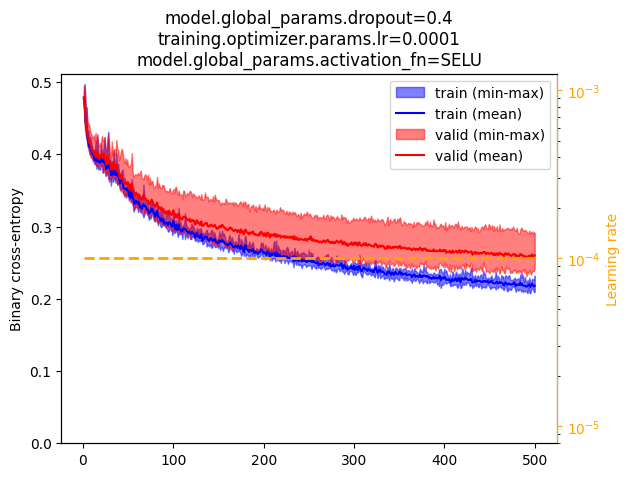

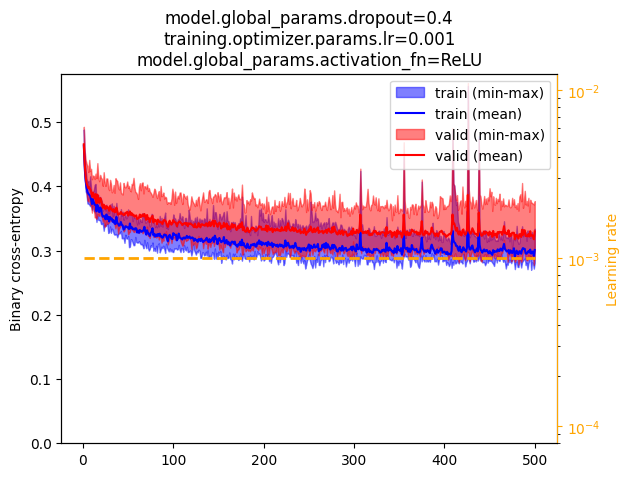

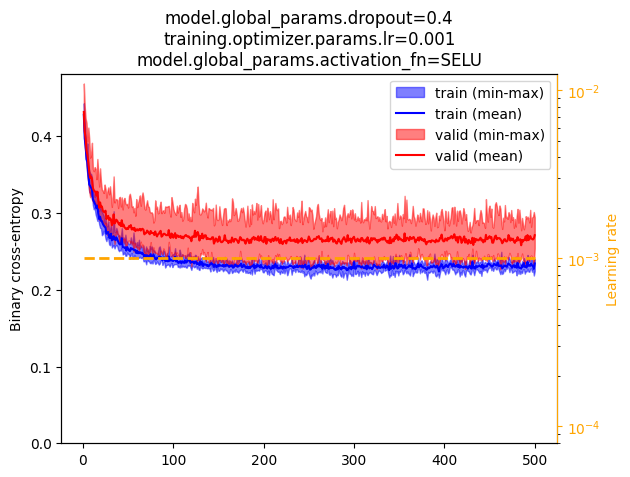

In [3]:
# Define a set of equivalent hyperparameters
equiv_hyperparams_dict = {
    'model.global_params.dropout': ['model.molecule_model.mpnn.dropout', 'model.molecule_model.fcnn_before_mpnn.dropout', 'model.molecule_model.fcnn_after_mpnn.dropout', 'model.protein_model.dropout', 'model.decision_model.dropout'],
    'model.global_params.activation_fn': ['model.molecule_model.mpnn.activation_fn', 'model.molecule_model.fcnn_before_mpnn.activation_fn', 'model.molecule_model.fcnn_after_mpnn.activation_fn', 'model.protein_model.activation_fn', 'model.decision_model.activation_fn'],
}

# Initialize hyperparameter analyzer object, which can be used to investigate
# the hyperparameter influence on the model performance, from the file
# 'hyperparam_scans' located in './saved/hyperparam_analysis_files'.
hp_analyzer = hyperparameter_analysis.HyperparamAnalyzer.from_file('hyperparam_scans',
                                                                   metric_optimization='min',
                                                                   optimal_metric_value='last_epoch',
                                                                   log10_hyperparams = ['training.optimizer.params.lr'],
                                                                   equiv_hyperparams_dict=equiv_hyperparams_dict)

print()
print(f"Number of problematic runs: {len(hp_analyzer.problematic_runs)}")
print(f"Number of missing runs: {len(hp_analyzer.missing_args_dict_list)}")
print()

# Plot the metric values (average over the ensemble over the evaluation set) resulting for each hyperparameter settings
hp_analyzer.plot_validation_metric_values(metric_label='Binary cross-entropy')

# Plot the metric vs. epoch curves (ensemble over the evaluation set) for each hyperparameter settings
hp_analyzer.plot_metric_curves(y_min=0, metric_label='Binary cross-entropy')